# BMME890 - Fall 2019

## Wine Quality Project

Group: Nhan Pham, Khoi Huynh, Frank Wang, and Jiayi Xu

### Classification

- Multilabel classification problem
- Labels: $3 - 9$
- Methods: ANN

In [12]:
import numpy as np
import pandas as pd
import matplotlib 
import seaborn as sns
from matplotlib import pyplot as plt

In [13]:
whiteset=pd.read_csv('winequality-white.csv')
redset=pd.read_csv('winequality-red.csv')
whiteset_added=whiteset
whiteset_added['type']='white'
redset_added=redset
redset_added['type']='red'
frames=[whiteset_added, redset_added]
dataset=pd.concat(frames,ignore_index=True)
dataset=dataset[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','type','quality']]
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,white,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,white,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,white,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,white,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,white,6


In [14]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [15]:
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
quality                 0
dtype: int64

## Note:

- The data look clean, no capped value, no missing values.
- Too few samples for quality <= 3 and >=9.

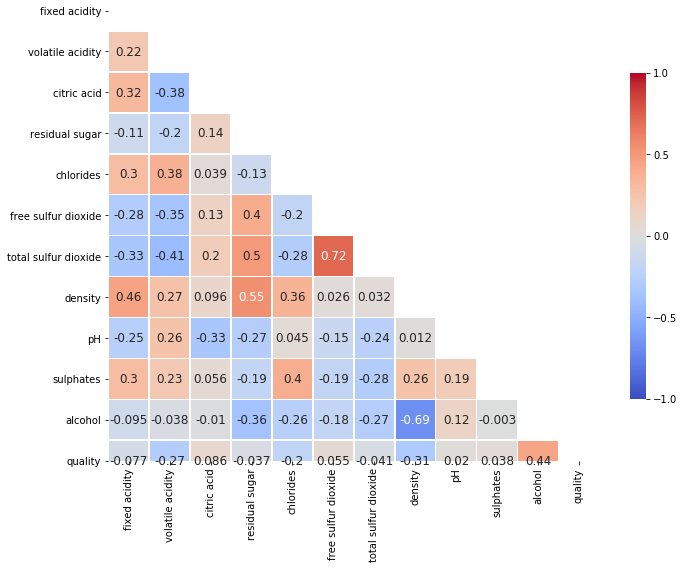

In [16]:
f, ax = plt.subplots(figsize=(11, 15)) 
corr_matrix = dataset.corr()
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True
heatmap = sns.heatmap(corr_matrix, mask = mask, square = True, linewidths = .5, cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 12})
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [17]:
# split into features and labels
dataset_y=dataset['quality']
dataset_x=dataset
dataset_x.drop(['quality'],axis=1,inplace=True)

dataset_x_num = dataset.drop("type", axis=1)
dataset_x_cat=dataset[['type']]

In [18]:
dataset_x_withonehot = pd.get_dummies(dataset_x)
dataset_x_withonehot.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_red,type_white
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0,1


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset_x_withonehot, dataset_y, test_size=0.2, random_state=42)

In [20]:
X_train_means = X_train.mean(axis=0)
X_train_stds = X_train.std(axis=0)

X_test_means = X_test.mean(axis=0)
X_test_stds = X_test.std(axis=0)

X_train_scaled = (X_train - X_train_means) / X_train_stds
X_test_scaled = (X_test - X_test_means) / X_test_stds

y_train_cat = y_train - np.amin(y_train)
y_test_cat = y_test - np.amin(y_test)

num_class = 7

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import GaussianNoise, BatchNormalization, Dropout
import keras
from tensorflow.keras import backend as K
import tensorflow as tf
from datetime import datetime
from tensorflow.keras import metrics
from tensorflow.keras import regularizers

input_shape = (None, 13)

def top2_acc(labels, logits): 
    return metrics.sparse_top_k_categorical_accuracy(y_true=labels, y_pred=logits, k=2)

def white_wine_model():
    model = Sequential()
    model.add(Flatten())
    
    model.add(BatchNormalization())
    
    model.add(GaussianNoise(stddev=0.01,
                          input_shape=input_shape))
    
    model.add(Dense(400, activation='selu',#input_shape=input_shape,
                    kernel_regularizer=regularizers.l2(0.001),kernel_initializer="lecun_normal"))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    
    for i in range(5):
        model.add(Dense(500, 
                    activation='selu',kernel_regularizer=regularizers.l2(0.001),kernel_initializer="lecun_normal"))
        model.add(BatchNormalization())
        model.add(Dropout(0.4))
    
    model.add(Dense(num_class, 
                    activation='softmax'))

    model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy', top2_acc])
    
    return model

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)

model = white_wine_model()

training_history = model.fit(
    X_train.to_numpy(),#x_train.to_numpy(), # input
    y_train_cat.to_numpy(),#y_train_cat.to_numpy(), # output
    batch_size=32,
    verbose=2, # Suppress chatty output; use Tensorboard instead
    epochs=60,
     validation_data=(X_test.to_numpy(), y_test_cat.to_numpy()))

Using TensorFlow backend.


Train on 5197 samples, validate on 1300 samples
Epoch 1/60
5197/5197 - 5s - loss: 4.9445 - accuracy: 0.3762 - top2_acc: 0.5994 - val_loss: 6.1174 - val_accuracy: 0.2577 - val_top2_acc: 0.4623
Epoch 2/60
5197/5197 - 2s - loss: 4.1800 - accuracy: 0.4491 - top2_acc: 0.7749 - val_loss: 3.7825 - val_accuracy: 0.4923 - val_top2_acc: 0.8669
Epoch 3/60
5197/5197 - 2s - loss: 3.7821 - accuracy: 0.4770 - top2_acc: 0.8168 - val_loss: 3.4505 - val_accuracy: 0.5323 - val_top2_acc: 0.8762
Epoch 4/60
5197/5197 - 2s - loss: 3.4867 - accuracy: 0.4982 - top2_acc: 0.8172 - val_loss: 3.1603 - val_accuracy: 0.5431 - val_top2_acc: 0.8800
Epoch 5/60
5197/5197 - 2s - loss: 3.1820 - accuracy: 0.5005 - top2_acc: 0.8212 - val_loss: 2.8961 - val_accuracy: 0.5577 - val_top2_acc: 0.8631
Epoch 6/60
5197/5197 - 2s - loss: 2.8789 - accuracy: 0.5064 - top2_acc: 0.8299 - val_loss: 2.6063 - val_accuracy: 0.5585 - val_top2_acc: 0.8700
Epoch 7/60
5197/5197 - 2s - loss: 2.6185 - accuracy: 0.5151 - top2_acc: 0.8286 - val_los

Epoch 58/60
5197/5197 - 2s - loss: 1.2255 - accuracy: 0.5365 - top2_acc: 0.8474 - val_loss: 1.1442 - val_accuracy: 0.5477 - val_top2_acc: 0.8785
Epoch 59/60
5197/5197 - 2s - loss: 1.2300 - accuracy: 0.5207 - top2_acc: 0.8399 - val_loss: 1.1503 - val_accuracy: 0.5454 - val_top2_acc: 0.8746
Epoch 60/60
5197/5197 - 2s - loss: 1.2288 - accuracy: 0.5257 - top2_acc: 0.8414 - val_loss: 1.1426 - val_accuracy: 0.5577 - val_top2_acc: 0.8815


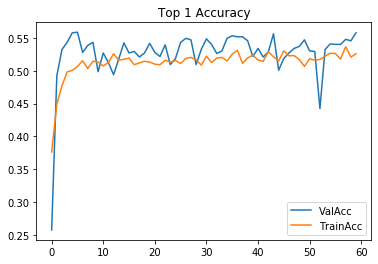

In [28]:
plt.plot(training_history.history['val_accuracy'])
plt.plot(training_history.history['accuracy'])
plt.legend(['ValAcc','TrainAcc'])
plt.title('Top 1 Accuracy')
plt.show()

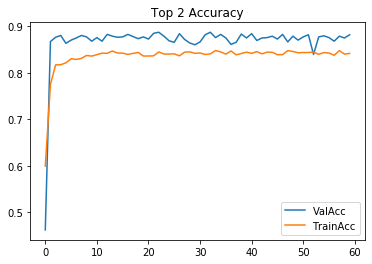

In [26]:

plt.plot(training_history.history['val_top2_acc'])
plt.plot(training_history.history['top2_acc'])
plt.legend(['ValAcc','TrainAcc'])
plt.title('Top 2 Accuracy')
plt.show()